In [1]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units

import importlib

import snapshot_obj
import simulation_tracing
import dataset_compute
import subhalo

In [194]:
importlib.reload(snapshot_obj)
importlib.reload(simulation_tracing)
importlib.reload(dataset_compute)
importlib.reload(subhalo)

<module 'subhalo' from '/home/kasper/Curvaton_Simulations/APOSTLE_analysis/subhalo.py'>

# Plotting trajectories of halos

## Tracing a satellite

In [100]:
sim_id = "V1_LR_fix"
start = 127; stop = 100
gn=2
snap0 = snapshot_obj.Snapshot(sim_id, start)
central = subhalo.Subhalo(sim_id, start, gn, 0)

First, identify the central halo through snapshots:

In [101]:
tracer = central.trace(stop=stop)
print(tracer)

{127: (2, 0), 126: (2.0, 0.0), 125: (2.0, 0.0), 124: (2.0, 0.0), 123: (2.0, 0.0), 122: (2.0, 0.0), 121: (2.0, 0.0), 120: (2.0, 0.0), 119: (2.0, 0.0), 118: (2.0, 0.0), 117: (2.0, 0.0), 116: (2.0, 0.0), 115: (2.0, 0.0), 114: (3.0, 0.0), 113: (3.0, 0.0), 112: (3.0, 0.0), 111: (3.0, 0.0), 110: (3.0, 0.0), 109: (3.0, 0.0), 108: (3.0, 0.0), 107: (3.0, 0.0), 106: (3.0, 0.0), 105: (3.0, 0.0), 104: (3.0, 0.0), 103: (3.0, 0.0), 102: (3.0, 0.0), 101: (3.0, 0.0), 100: (3.0, 0.0)}


Then, select a satellite that can be traced back through a couple snapshots (for instance, the M31 satellite (1,4)):

In [201]:
sim_tracer = simulation_tracing.SimulationTracer(snap0, stop=115)
sim_tracer.trace_all()

array([[4294967296, 4294967296, 4294967296, ...,          0,          0,
                 0],
       [4294967296, 4294967296, 4294967296, ...,          1,          1,
                 1],
       [4294967296, 4294967296, 4294967296, ...,        255,        241,
                 2],
       ...,
       [4294967296, 4294967296, 4294967296, ..., 4294967296, 4294967296,
              1122],
       [4294967296, 4294967296, 4294967296, ..., 4294967296, 4294967296,
              1123],
       [4294967296, 4294967296, 4294967296, ..., 4294967296, 4294967296,
              1124]])

In [195]:
gn=2; sgn=8
satellite = subhalo.Subhalo(snap0, gn, sgn)

In [205]:
idx = satellite.tracer[-1]
satellite.tracer = sim_tracer.tracer[idx]

In [174]:
sat_tracer = satellite.trace(stop=stop)
print(sat_tracer)

{127: (2, 8), 126: (2.0, 7.0), 125: (2.0, 7.0), 124: (2.0, 6.0), 123: (2.0, 7.0), 122: (2.0, 6.0), 121: (2.0, 5.0), 120: (2.0, 5.0), 119: (2.0, 5.0), 118: (2.0, 5.0), 117: (2.0, 5.0), 116: (2.0, 6.0), 115: (2.0, 7.0), 114: (3.0, 5.0), 113: (3.0, 5.0), 112: (3.0, 6.0), 111: (3.0, 4.0), 110: (3.0, 2.0), 109: (3.0, 2.0), 108: (3.0, 2.0), 107: (3.0, 2.0), 106: (3.0, 2.0), 105: (3.0, 2.0), 104: (3.0, 2.0), 103: (3.0, 2.0), 102: (3.0, 2.0), 101: (3.0, 2.0), 100: (3.0, 2.0)}


In [208]:
n_snaps = satellite.tracer.size
n_traced = np.sum(satellite.tracer < 2**32)
snap_ids = np.arange(n_snaps-n_traced, n_snaps)
d = [satellite.distance_to_central(sid, central) for sid in snap_ids]

In [209]:
for sid in snap_ids:
    print("{} : {}".format(sid, satellite.get_halo_data("MassType", sid)[1]))

115 : 6.90912123028697e+42
116 : 6.734207040545616e+42
117 : 6.06370159403675e+42
118 : 6.35522566460581e+42
119 : 6.48641141216186e+42
120 : 6.675901889631695e+42
121 : 6.224039917049761e+42
122 : 6.00539644312283e+42
123 : 5.17455309460109e+42
124 : 4.6498096833767543e+42
125 : 5.116247943687169e+42
126 : 4.72269070101902e+42
127 : 4.606080820191314e+42


In [210]:
d_cgs = np.array(d).reshape((len(d),3))
d = d_cgs * units.cm.to(units.kpc)

Plot in the xy- and xz-plane:

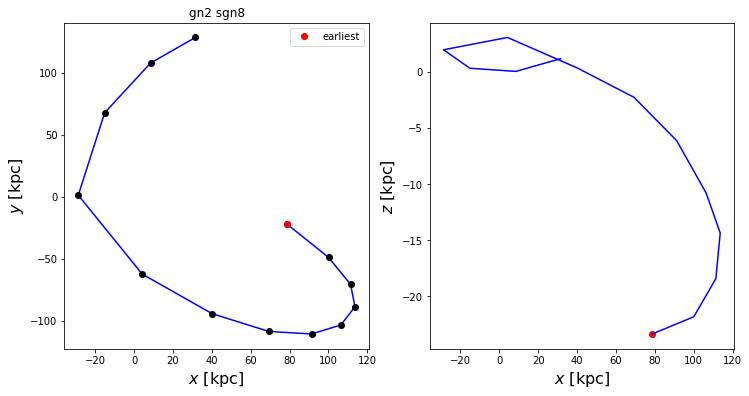

In [211]:
fig,ax = plt.subplots(ncols=2, figsize=(12,6))

ax[0].set_title('gn{} sgn{}'.format(gn,sgn))

ax[0].plot(d[:,0], d[:,1], 'b')
ax[0].plot(d[:,0], d[:,1], 'ko')
ax[0].plot(d[0,0], d[0,1], 'ro', label='earliest')
ax[0].set_xlabel('$x$ [kpc]', fontsize=16)
ax[0].set_ylabel('$y$ [kpc]', fontsize=16)

ax[1].plot(d[0,0], d[0,2], 'ro')
ax[1].plot(d[:,0], d[:,2], 'b')
ax[1].set_xlabel('$x$ [kpc]', fontsize=16)
ax[1].set_ylabel('$z$ [kpc]', fontsize=16)

ax[0].legend()

# Save figure:

filename = 'satellite_trajectory_gn{}sgn{}.png'.format(gn,sgn)

home = os.path.dirname(snapshot_obj.__file__)
path = os.path.join(home,"Figures")

# If the directory does not exist, create it
#if not os.path.exists(path):
#    os.makedirs(path)
#plt.savefig(os.path.join(path,filename), dpi=200)

# Plot evolution of mass components

In [179]:
z = np.zeros(snap_ids.size)
for i,sid in enumerate(snap_ids):
    z[i] = snapshot_obj.Snapshot(sim_id, sid).get_attribute('Redshift', 'Header')

In [180]:
masses = np.zeros((snap_ids.size, 6))
for i,sid in enumerate(snap_ids):
    masses[i] = satellite.get_halo_data("MassType", sid) * units.g.to(units.Msun)

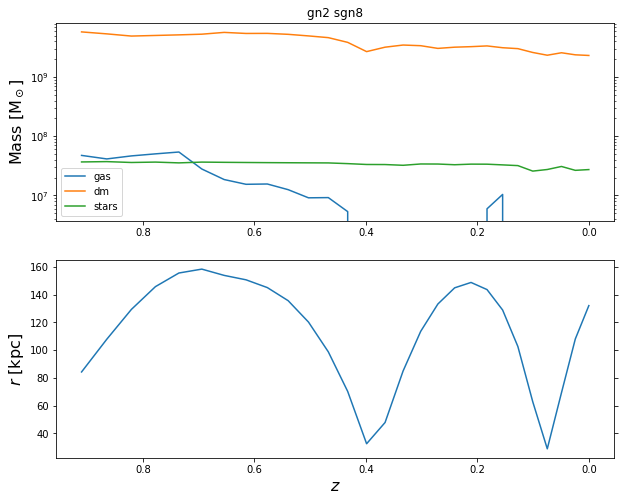

In [181]:
fig,ax = plt.subplots(nrows=2, figsize=(10,8))

ax[0].set_title('gn{} sgn{}'.format(gn,sgn))

ax[0].set_yscale('log')
ax[0].set_ylabel('Mass $[\mathrm{M_\odot}]$', fontsize=16)

ax[1].set_xlabel('$z$', fontsize=16)
ax[1].set_ylabel('$r$ [kpc]', fontsize=16)

ax[0].yaxis.set_ticks_position('both')
ax[1].yaxis.set_ticks_position('both')

ax[0].invert_xaxis()
ax[1].invert_xaxis()

for pt,l in zip([0,1,4],['gas', 'dm', 'stars']):
    ax[0].plot(z, masses[:,pt], label=l)
    
ax[0].legend()

ax[1].plot(z, np.linalg.norm(d, axis=1))

# Save figure:

filename = 'satellite_mass_evol_gn{}sgn{}.png'.format(gn,sgn)

home = os.path.dirname(snapshot_obj.__file__)
path = os.path.join(home,"Figures")

# If the directory does not exist, create it
if not os.path.exists(path):
    os.makedirs(path)
plt.savefig(os.path.join(path,filename), dpi=200)

Dump:

In [182]:
r = np.zeros((start-stop,3))
print(r)
 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [183]:
for sid in range(start, stop, -1):
    print(sid)
    snap = snapshot_obj.Snapshot(sim_id, sid)
    gns = snap.get_subhalos("GroupNumber")
    sgns = snap.get_subhalos("SubGroupNumber")
    cops = snap.get_subhalos("CentreOfPotential")
    
    galactic_centre = cops[np.logical_and(gns==gn, sgns==0)][0]
    halo_cop = cops[np.logical_and(gns==gn, sgns==sgn)][0]
    halo_cop = dataset_compute.periodic_wrap(snap, galactic_centre, halo_cop)
    print(galactic_centre, halo_cop)
  
    r[start-sid] = halo_cop - galactic_centre

127
[2.78376707e+25 5.25148725e+25 2.60718251e+26] [2.79349334e+25 5.29108497e+25 2.60721779e+26]
126
[2.74213307e+25 5.12221307e+25 2.54312335e+26] [2.70344986e+25 5.16116705e+25 2.54851289e+26]
125
[2.70159085e+25 4.99606371e+25 2.48051613e+26] [2.71813341e+25 5.04917129e+25 2.47769315e+26]
124
[2.66241390e+25 4.87262256e+25 2.41933486e+26] [2.63318576e+25 4.92780818e+25 2.42357491e+26]
123
[2.62433645e+25 4.75190102e+25 2.35962452e+26] [2.60101372e+25 4.69344892e+25 2.36011778e+26]
122
[2.58754479e+25 4.63520771e+25 2.30135346e+26] [2.58993709e+25 4.66572851e+25 2.30222585e+26]
121
[2.55120552e+25 4.52170227e+25 2.24446906e+26] [2.53868659e+25 4.58757324e+25 2.24619436e+26]
120
[2.51498962e+25 4.41083052e+25 2.18895432e+26] [2.53205909e+25 4.44959864e+25 2.19108506e+26]
119
[2.47906783e+25 4.30238750e+25 2.13476263e+26] [2.50179730e+25 4.26838541e+25 2.13242219e+26]
118
[2.44359012e+25 4.19638775e+25 2.08188796e+26] [2.44691598e+25 4.20202075e+25 2.08805977e+26]
117
[2.40872594e+25 

In [184]:
d = r * units.cm.to(units.kpc)

Compute the distance from the central halo for each snapshot:

In [185]:
print(d, r)

[[  31.52070148  128.32746296    1.14332561]
 [-125.36374548  126.24126591  174.66293573]
 [  53.61076678  172.10994279  -91.48654948]
 [ -94.7219654   178.84439948  137.41067016]
 [ -75.58383977 -189.43037532   15.98545718]
 [   7.75293184   98.91116424   28.27200564]
 [ -40.57110334  213.47327919   55.9132158 ]
 [  55.31837447  125.63892442   69.05261528]
 [  73.66122385 -110.19326359  -75.84851669]
 [  10.77839384   18.25530752  200.01467365]
 [ -22.67165468   47.70853745  213.66995281]
 [ -24.95477926   63.39533768  237.72601224]
 [ 110.35174055   83.26824903  109.07361352]
 [  78.02145736   84.19921413 -140.6322485 ]
 [  -6.18782327   37.27995256  -56.38623088]
 [  38.88921003  -34.09176159  103.84197221]
 [   8.15327932   18.62353923   -1.64681011]
 [   4.02941659  -10.00369585   13.23011307]
 [ -14.2620695   -62.80097157  -50.7236586 ]
 [ 123.84443336 -196.42630587 -116.59969014]
 [  23.07165649 -279.7005373    71.52725115]
 [  41.71806934 -251.45968849   73.13773621]
 [  47.682

In [186]:
for sid in list(snap_ids):
    print(satellite.get_halo_data("CentreOfPotential", sid),
         central.get_halo_data("CentreOfPotential", sid))

[1.86035055e+25 2.66007173e+25 1.32900669e+26] [1.86158488e+25 2.67623447e+25 1.32697347e+26]
[1.88475970e+25 2.72532135e+25 1.36315162e+26] [1.89238999e+25 2.74265932e+25 1.36041435e+26]
[1.90948603e+25 2.79319194e+25 1.39798073e+26] [1.92356055e+25 2.81178571e+25 1.39473914e+26]
[1.93478910e+25 2.86390215e+25 1.43352387e+26] [1.95421385e+25 2.88364445e+25 1.42997687e+26]
[1.96116409e+25 2.93744572e+25 1.46988631e+26] [1.98462547e+25 2.95747531e+25 1.46620403e+26]
[1.98841707e+25 3.01354257e+25 1.50702285e+26] [2.01509171e+25 3.03396931e+25 1.50346919e+26]
[2.01676508e+25 3.09202430e+25 1.54505877e+26] [2.04490010e+25 3.11136775e+25 1.54175575e+26]
[2.04594455e+25 3.17348625e+25 1.58396888e+26] [2.07603093e+25 3.18969168e+25 1.58081221e+26]
[2.07660060e+25 3.25719997e+25 1.62369300e+26] [2.10785815e+25 3.27121094e+25 1.62080710e+26]
[2.10884363e+25 3.34363695e+25 1.66437855e+26] [2.14015868e+25 3.35460763e+25 1.66182402e+26]
[2.14293093e+25 3.43257805e+25 1.70601156e+26] [2.17262946e+